In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
x = np.array([[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2],[-2,0]])
y = np.array([-1, -1, -1, 1, 1, 1, 1])


In [3]:
def my_kernel(x1, x2):
    print ('kernel shape', x1.shape, x2.shape)
    tmp = (1 + 2 * np.dot(x1, x2.T))**2
    print ('kernel return shape', tmp.shape)
    return tmp

In [4]:
from sklearn import svm

In [5]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel=my_kernel, C=1e10)
clf.fit(x, y)

kernel shape (7, 2) (7, 2)
kernel return shape (7, 7)


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel=<function my_kernel at 0x7f779fd7b378>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

kernel shape (900, 2) (7, 2)
kernel return shape (900, 7)


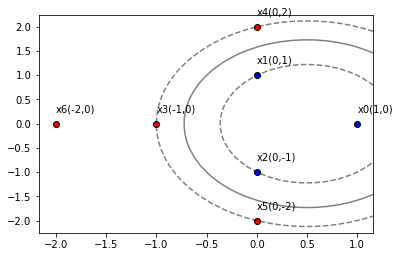

In [6]:
for i, j in enumerate(x):
    t1, t2 = j[0], j[1]
    coordinate = "x%d(%s,%s)\n" % (i, t1, t2)
    if y[i] == 1:
        plt.scatter(t1, t2, c='r', edgecolors='k')
        plt.annotate(coordinate, (t1,t2),  fontsize=10)
    elif y[i] == -1:
        plt.scatter(t1, t2, c='b', edgecolors='k')
        plt.annotate(coordinate, (t1,t2),  fontsize=10)

        
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


plt.savefig('2.png')
plt.show()

In [7]:
clf.dual_coef_

array([[-0.21970141, -0.28015714,  0.33323258,  0.06819373,  0.09843225]])

kernel shape (7, 2) (7, 2)
kernel return shape (7, 7)
kernel shape (75000, 2) (7, 2)
kernel return shape (75000, 7)


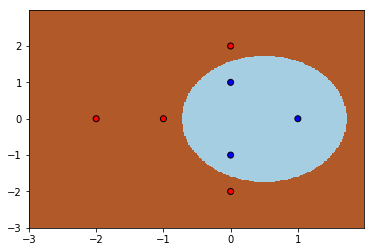

In [8]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(C=1e20, kernel=my_kernel)
clf.fit(x, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
p = ['r' if i == 1 else 'b' for i in y]
plt.scatter(x[:, 0], x[:, 1], c=p, cmap=plt.cm.Paired, edgecolors='k')
plt.show()